In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db1 = pd.read_csv('/content/drive/MyDrive/ds4g/Db1.csv')
db2 = pd.read_csv('/content/drive/MyDrive/ds4g/Db2.csv')
df = db1.append(db2)

In [ ]:
df.shape

(462563, 14)

In [ ]:
df.head()

,Menopause,Age group,density,bmi,Age at first birth,No of first degree relatives with cancer,Previous breast cancer procedure,Result of last mammogram,Surgical menopause,Current hormone therapy,invasive,cancer,training,count
0,1,4,1,9,9,9,0,0,1,9,0,0,1,6
1,1,4,1,9,9,9,0,9,0,0,0,0,0,1
2,1,4,1,9,9,9,0,9,0,0,0,0,1,9
3,1,4,1,9,9,9,0,9,0,9,0,0,0,1
4,1,4,1,9,9,9,0,9,0,9,0,0,1,2


In [ ]:
df.drop('training', axis='columns', inplace=True)
#df.drop('invasive', axis='columns', inplace=True)

In [ ]:
df_dropped = df.replace(9, np.NaN)

<BarContainer object of 13 artists>

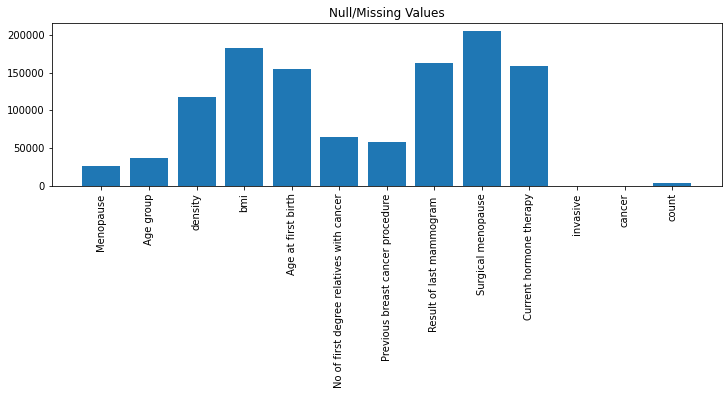

In [ ]:
x = df_dropped.columns
y = df_dropped.isna().sum()
fig, p= plt.subplots(figsize = (12, 3))
plt.title('Null/Missing Values')
plt.xticks(rotation='vertical')
p.bar(x,y)

In [ ]:
df_dropped.head()

,Menopause,Age group,density,bmi,Age at first birth,No of first degree relatives with cancer,Previous breast cancer procedure,Result of last mammogram,Surgical menopause,Current hormone therapy,invasive,cancer,count
0,1.0,4.0,1.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0,0,6.0
1,1.0,4.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0,0,1.0
2,1.0,4.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0,0,NaN
3,1.0,4.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,0,1.0
4,1.0,4.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,0,2.0


In [ ]:
df_dropped['bmi'] = df_dropped['bmi'].replace(2, np.NaN)

In [ ]:
df_dropped = df_dropped.dropna()

In [ ]:
df_dropped.shape

(29858, 13)

In [ ]:
df_dropped = df_dropped.drop_duplicates()

In [ ]:
df_dropped.shape

(15203, 13)

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203 entries, 29 to 181193
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Menopause                                 15203 non-null  float64
 1   Age group                                 15203 non-null  float64
 2   density                                   15203 non-null  float64
 3   bmi                                       15203 non-null  float64
 4   Age at first birth                        15203 non-null  float64
 5   No of first degree relatives with cancer  15203 non-null  float64
 6   Previous breast cancer procedure          15203 non-null  float64
 7   Result of last mammogram                  15203 non-null  float64
 8   Surgical menopause                        15203 non-null  float64
 9   Current hormone therapy                   15203 non-null  float64
 10  invasive                        

In [ ]:
df_dropped.describe()

,Menopause,Age group,density,bmi,Age at first birth,No of first degree relatives with cancer,Previous breast cancer procedure,Result of last mammogram,Surgical menopause,Current hormone therapy,invasive,cancer,count
count,15203.0,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000,15203.000000
mean,1.0,5.753272,2.423732,2.239295,0.643557,0.421693,0.378017,0.077287,0.393738,0.472209,0.033217,0.043544,11.453726
std,0.0,1.967195,0.883353,1.264345,0.829635,0.615414,0.484908,0.267056,0.488594,0.499244,0.179209,0.204085,38.214238
min,1.0,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.0,6.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.0,7.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.000000
max,1.0,10.000000,4.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1128.000000


In [ ]:
df_dropped.cancer.value_counts()

0    14541
1      662
Name: cancer, dtype: int64

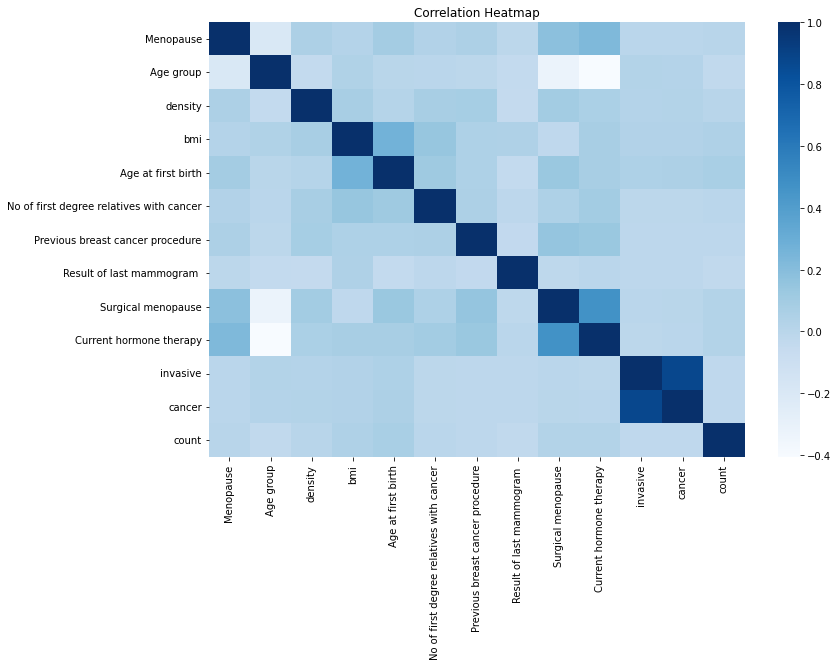

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(),cmap='Blues')

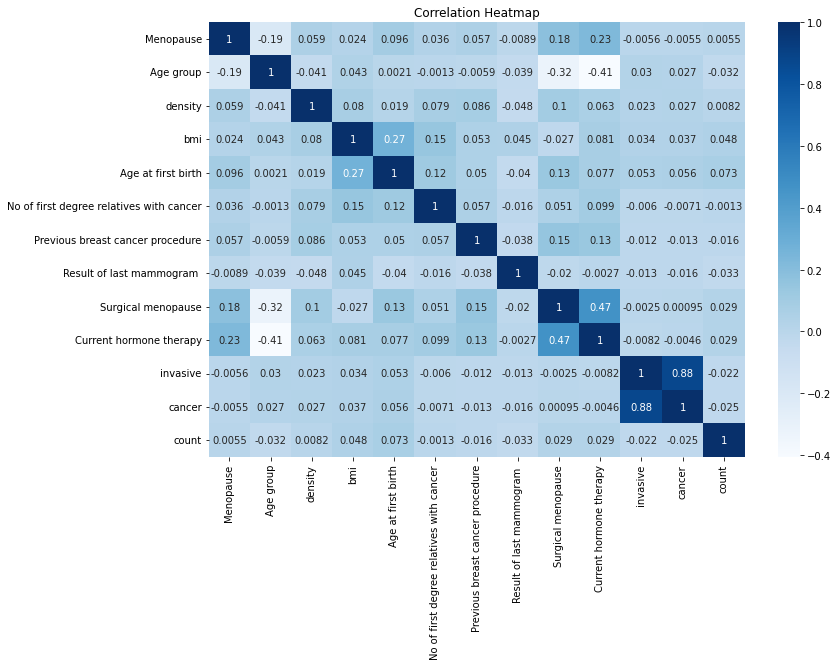

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(),cmap='Blues', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


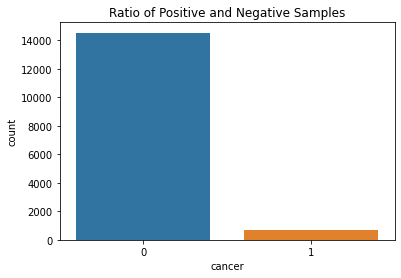

In [ ]:
plt.title('Ratio of Positive and Negative Samples')
sns.countplot(df_dropped['cancer'])

In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203 entries, 29 to 181193
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Menopause                                 15203 non-null  float64
 1   Age group                                 15203 non-null  float64
 2   density                                   15203 non-null  float64
 3   bmi                                       15203 non-null  float64
 4   Age at first birth                        15203 non-null  float64
 5   No of first degree relatives with cancer  15203 non-null  float64
 6   Previous breast cancer procedure          15203 non-null  float64
 7   Result of last mammogram                  15203 non-null  float64
 8   Surgical menopause                        15203 non-null  float64
 9   Current hormone therapy                   15203 non-null  float64
 10  invasive                        

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
col=df_dropped.columns
y = df_dropped[['cancer']]
X = df_dropped.iloc[:, col != 'cancer'].values
X_new = df_dropped.drop(['cancer'], axis=1)
y_new = df_dropped['cancer']

In [ ]:
print('Features: ')
for col in X_new:
  print(col)

Features: 
Menopause
Age group
density
bmi
Age at first birth
No of first degree relatives with cancer
Previous breast cancer procedure
Result of last mammogram 
Surgical menopause
Current hormone therapy
invasive
count


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("Test Accuracy: {}".format(rfc.score(X_test,y_test)))
print("Train Accuracy: {}".format(rfc.score(X_train,y_train)))
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Test Accuracy: 0.9847408576690345
Train Accuracy: 0.9943428496250494
[[7231   33]
 [  83  255]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7264
           1       0.89      0.75      0.81       338

    accuracy                           0.98      7602
   macro avg       0.94      0.87      0.90      7602
weighted avg       0.98      0.98      0.98      7602



In [ ]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_new.columns).sort_values(ascending=False)

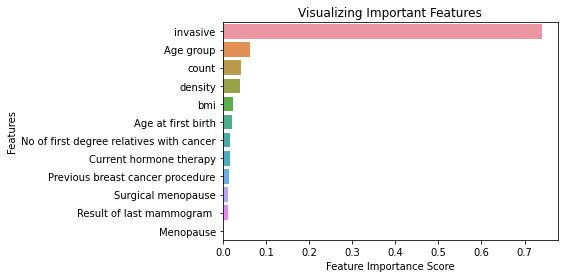

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dtc.predict(X_test)
print("Test Accuracy: {}".format(dtc.score(X_test,y_test)))
print("Train Accuracy: {}".format(dtc.score(X_train,y_train)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Test Accuracy: 0.9815837937384899
Train Accuracy: 0.9944744112616761
[[7205   59]
 [  81  257]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7264
           1       0.81      0.76      0.79       338

    accuracy                           0.98      7602
   macro avg       0.90      0.88      0.89      7602
weighted avg       0.98      0.98      0.98      7602



**Support Vector Classifier**


In [ ]:
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Test Accuracy: {}".format(svclassifier.score(X_test,y_test)))
print("Train Accuracy: {}".format(svclassifier.score(X_train,y_train)))
y_pred = svclassifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Test Accuracy: 0.988950276243094
Train Accuracy: 0.9903960005262465
[[7264    0]
 [  84  254]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7264
           1       1.00      0.75      0.86       338

    accuracy                           0.99      7602
   macro avg       0.99      0.88      0.93      7602
weighted avg       0.99      0.99      0.99      7602



Support Vector Classifier has highest accuracy and F1-scores. Therefore chosen as final model.

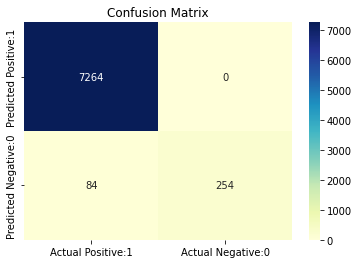

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predicted Positive:1', 'Predicted Negative:0'])
plt.title('Confusion Matrix')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
df_dropped.to_csv('breast_cancer.csv')